<a href="https://colab.research.google.com/github/venetisgr/space_titanic_basic/blob/main/forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data and Library load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Portofolio/space_titanic

/content/drive/MyDrive/Portofolio/space_titanic


In [ ]:
!ls

forests.ipynb  sample_submission.csv  test.csv	train.csv


In [ ]:
# #update sklearn 
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Dataset Information

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
print("train")
print(train.shape)
print("test")
test.shape

train
(8693, 14)
test


(4277, 13)

In [ ]:
print("train")
print()
print(train.info())
print()
print("test")
print()
test.info()

train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None

test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column     

In [ ]:
print("train")
print()
print(train.describe())
print()
print("test")
print()
test.describe()

train

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  

test



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
print("train")
print(train.duplicated().sum())
print()
print("test")
test.duplicated().sum()

train
0

test


0

In [ ]:
print("train")
info_dp=pd.DataFrame(train.dtypes,columns=['Data types'])
info_dp['missing']=train.isnull().sum()
info_dp['unique_vals']=train.nunique()
info_dp['count']=train.count()
info_dp#useful info

train


,Data types,missing,unique_vals,count
PassengerId,object,0,8693,8693
HomePlanet,object,201,3,8492
CryoSleep,object,217,2,8476
Cabin,object,199,6560,8494
Destination,object,182,3,8511
Age,float64,179,80,8514
VIP,object,203,2,8490
RoomService,float64,181,1273,8512
FoodCourt,float64,183,1507,8510
ShoppingMall,float64,208,1115,8485


In [ ]:
info_dp.missing.max()/train.shape[0]

#At worse, missing values are 2.5% of total, in my opinion we can impute them without having to drop the columns

0.02496261359714713

In [ ]:
train[train.isnull().sum(axis=1)>3].shape[0]
#no rows with more than 3 missing values

0

In [ ]:
print(train[train.isnull().sum(axis=1)==3].shape[0])
train.drop(train[train.isnull().sum(axis=1)==3].index,axis=0,inplace=True)
#drop rows that have more than 5 missing values

17


In [ ]:
print("new train")
info_dp=pd.DataFrame(train.dtypes,columns=['Data types'])
info_dp['missing']=train.isnull().sum()
info_dp['unique_vals']=train.nunique()
info_dp['count']=train.count()
info_dp#useful info

new train


,Data types,missing,unique_vals,count
PassengerId,object,0,8676,8676
HomePlanet,object,196,3,8480
CryoSleep,object,211,2,8465
Cabin,object,194,6552,8482
Destination,object,176,3,8500
Age,float64,174,80,8502
VIP,object,199,2,8477
RoomService,float64,181,1272,8495
FoodCourt,float64,180,1507,8496
ShoppingMall,float64,204,1114,8472


In [ ]:
print("test")
info_dp=pd.DataFrame(test.dtypes,columns=['Data types'])
info_dp['missing']=test.isnull().sum()
info_dp['unique_vals']=test.nunique()
info_dp['count']=test.count()
info_dp#useful info

test


,Data types,missing,unique_vals,count
PassengerId,object,0,4277,4277
HomePlanet,object,87,3,4190
CryoSleep,object,93,2,4184
Cabin,object,100,3265,4177
Destination,object,92,3,4185
Age,float64,91,79,4186
VIP,object,93,2,4184
RoomService,float64,82,842,4195
FoodCourt,float64,106,902,4171
ShoppingMall,float64,98,715,4179


In [ ]:
info_dp.missing.max()/test.shape[0]
#At worse, missing values are 2.5% of total, in my opinion we can impute them without having to drop the columns

0.024783726911386486

In [ ]:
test[test.isnull().sum(axis=1)>3].shape[0]
#no rows with more than 3 missing values

0

In [ ]:
print(test[test.isnull().sum(axis=1)==3].shape[0])
#no rows with 3 missing values

4


In [ ]:
missing_values = pd.concat([
    train.drop(columns=['Transported']).isnull().sum(), test.isnull().sum()],
    axis=1)
missing_values.columns = ['Number of missing value (train)', 'Number of missing value (test)']
missing_values['% of missing value (train)'] = 100 * missing_values['Number of missing value (train)'] / train.shape[0]
missing_values['% of missing value (test)'] = 100 * missing_values['Number of missing value (test)'] / test.shape[0]
missing_values

,Number of missing value (train),Number of missing value (test),% of missing value (train),% of missing value (test)
PassengerId,0,0,0.000000,0.000000
HomePlanet,196,87,2.259106,2.034136
CryoSleep,211,93,2.431996,2.174421
Cabin,194,100,2.236053,2.338087
Destination,176,92,2.028585,2.151040
Age,174,91,2.005533,2.127660
VIP,199,93,2.293684,2.174421
RoomService,181,82,2.086215,1.917232
FoodCourt,180,106,2.074689,2.478373
ShoppingMall,204,98,2.351314,2.291326


## Data exploration and cleaning 

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Transported - Categorical (Target Column)

In [ ]:
train["Transported"].value_counts()

True     4368
False    4308
Name: Transported, dtype: int64

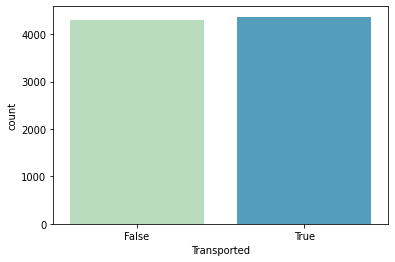

In [ ]:
sns.countplot(data=train,x="Transported", palette='GnBu');

In [ ]:
train["Transported"] = train["Transported"].astype(float)

we can see that our target variable is balanced

### Name - Categorical

Will be used later in feature engineering

Has no useful information - DROP IT

### **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.**

### VRDeck - Numerical

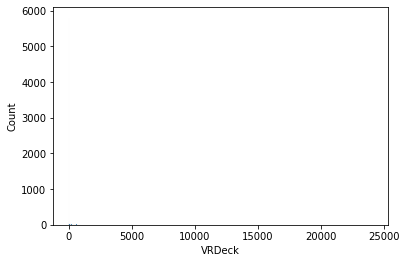

In [ ]:
sns.histplot(data=train,x="VRDeck");

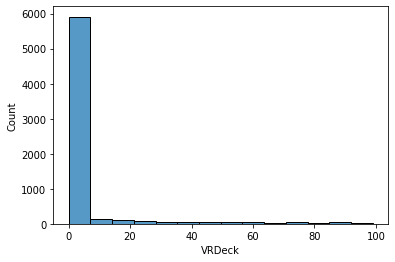

In [ ]:
mask = train["VRDeck"]<100
sns.histplot(data=train[mask],x="VRDeck");

**add constant and log transform**
since log(0) isn't defined

**common constant options**

https://aosmith.rbind.io/2018/09/19/the-log-0-problem/#common-choices-of-c

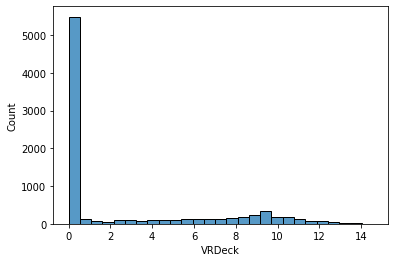

In [ ]:
#add 1
sns.histplot(x=np.log2(train['VRDeck']+1)); #we add a small number to avoid having log0

In [ ]:
train['VRDeck'].sort_values().unique()
#add the smallest non zero value, in our case it is 1 (same as above)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.0336e+04, 2.4133e+04,
              nan])

In [ ]:
train['log_VRDeck'] = np.log2(train['VRDeck']+1e0)
test['log_VRDeck'] = np.log2(test['VRDeck']+1e0)

In [ ]:
# sns.boxplot(data=train,x="VRDeck");
# plt.axvline(20_000, 0,1);
# plt.axvline(10_000, 0,1);
# plt.axvline(1_000, 0,1);

### Spa - Numerical

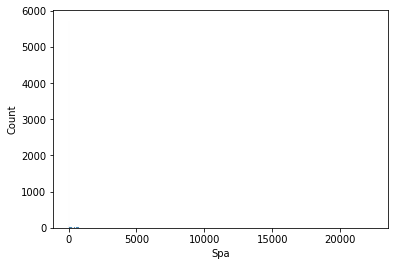

In [ ]:
sns.histplot(data=train,x="Spa");

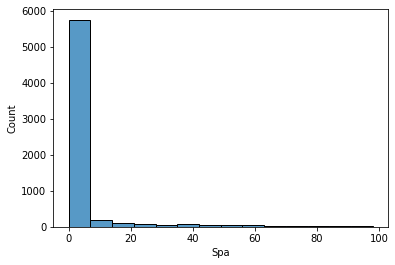

In [ ]:
mask = train["Spa"]<100
sns.histplot(data=train[mask],x="Spa");

**add constant and log transform**
since log(0) isn't defined

**common constant options**

https://aosmith.rbind.io/2018/09/19/the-log-0-problem/#common-choices-of-c

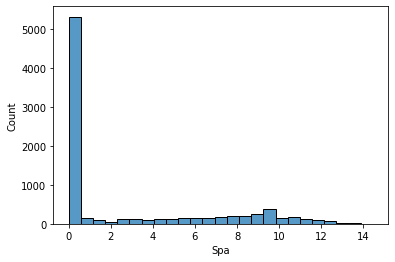

In [ ]:
#add 1
sns.histplot(x=np.log2(train['Spa']+1)); #we add a small number to avoid having log0

In [ ]:
train['Spa'].sort_values().unique()
#add the smallest non zero value, in our case it is 1 (same as above)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.8572e+04, 2.2408e+04,
              nan])

In [ ]:
train['log_Spa'] = np.log2(train['Spa']+1e0)
test['log_Spa'] = np.log2(test['Spa']+1e0)

### ShoppingMall -  Numerical

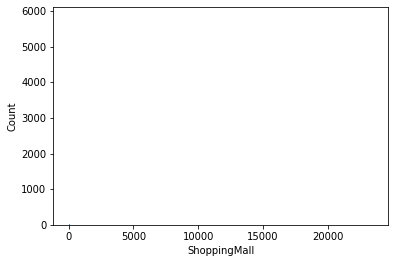

In [ ]:
sns.histplot(data=train,x="ShoppingMall");

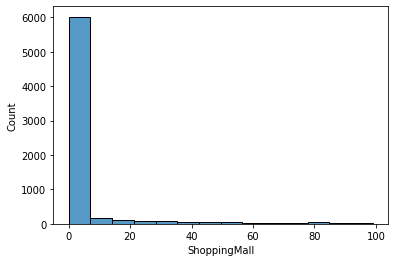

In [ ]:
mask = train["ShoppingMall"]<100
sns.histplot(data=train[mask],x="ShoppingMall");

**add constant and log transform**
since log(0) isn't defined

**common constant options**

https://aosmith.rbind.io/2018/09/19/the-log-0-problem/#common-choices-of-c

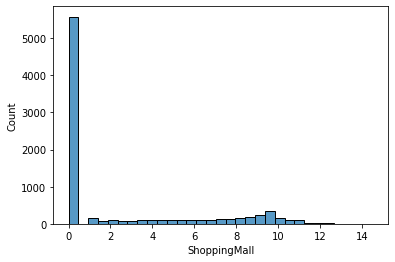

In [ ]:
#add 1
sns.histplot(x=np.log2(train['ShoppingMall']+1)); #we add a small number to avoid having log0

In [ ]:
train['ShoppingMall'].sort_values().unique()
#add the smallest non zero value, in our case it is 1 (same as above)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.2253e+04, 2.3492e+04,
              nan])

In [ ]:
train['log_ShoppingMall'] = np.log2(train['ShoppingMall']+1e0)
test['log_ShoppingMall'] = np.log2(test['ShoppingMall']+1e0)

### FoodCourt - Numerical

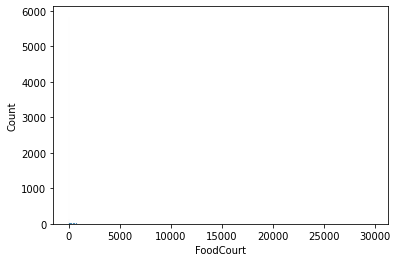

In [ ]:
sns.histplot(data=train,x="FoodCourt");

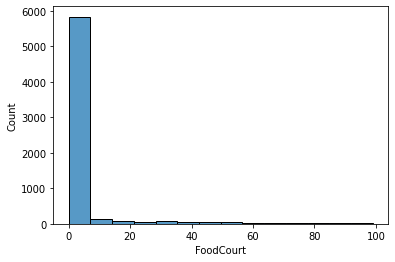

In [ ]:
mask = train["FoodCourt"]<100
sns.histplot(data=train[mask],x="FoodCourt");

**add constant and log transform**
since log(0) isn't defined

**common constant options**

https://aosmith.rbind.io/2018/09/19/the-log-0-problem/#common-choices-of-c

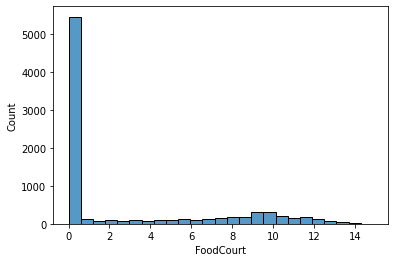

In [ ]:
#add 1
sns.histplot(x=np.log2(train['FoodCourt']+1)); #we add a small number to avoid having log0

In [ ]:
train['FoodCourt'].sort_values().unique()
#add the smallest non zero value, in our case it is 1 (same as above)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.7723e+04, 2.9813e+04,
              nan])

In [ ]:
train['log_FoodCourt'] = np.log2(train['FoodCourt']+1e0)
test['log_FoodCourt'] = np.log2(test['FoodCourt']+1e0)

### RoomService - Numerical

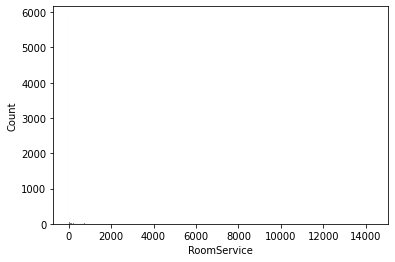

In [ ]:
sns.histplot(data=train,x="RoomService");

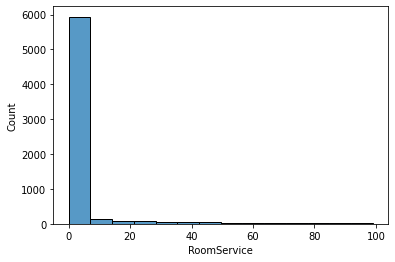

In [ ]:
mask = train["RoomService"]<100
sns.histplot(data=train[mask],x="RoomService");

**add constant and log transform**
since log(0) isn't defined

**common constant options**

https://aosmith.rbind.io/2018/09/19/the-log-0-problem/#common-choices-of-c

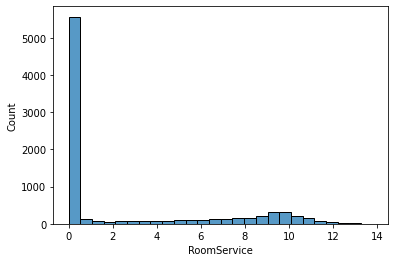

In [ ]:
#add 1
sns.histplot(x=np.log2(train['RoomService']+1)); #we add a small number to avoid having log0

In [ ]:
train['RoomService'].sort_values().unique()
#add the smallest non zero value, in our case it is 1 (same as above)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9200e+03, 1.4327e+04,
              nan])

In [ ]:
train['log_RoomService'] = np.log2(train['RoomService']+1e0)
test['log_RoomService'] = np.log2(test['RoomService']+1e0)

### We can observe that a great portion of passengers don't use amenities

### VIP -  Categorical (Binary)

In [ ]:
train["VIP"] = train["VIP"].astype(float)
test["VIP"] = test["VIP"].astype(float)
#convert to float from boolean (float due to the fact we have NaN)

In [ ]:
train["VIP"].value_counts()

0.0    8278
1.0     199
Name: VIP, dtype: int64

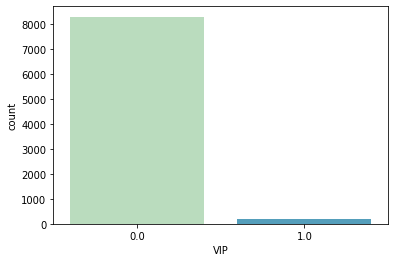

In [ ]:
sns.countplot(data=train,x="VIP", palette='GnBu');

it seems most of passengers weren't VIPs

### Age -  Numerical


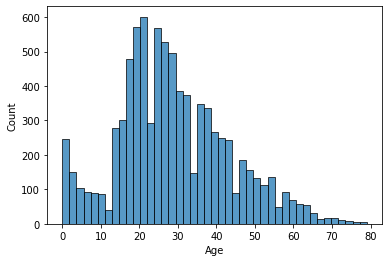

In [ ]:
sns.histplot(data=train,x="Age");

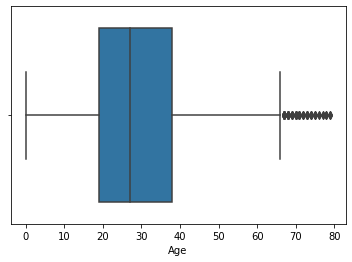

In [ ]:
sns.boxplot(data=train,x="Age");

### Destination - Categorical

In [ ]:
train["Destination"].value_counts()

TRAPPIST-1e      5906
55 Cancri e      1800
PSO J318.5-22     794
Name: Destination, dtype: int64

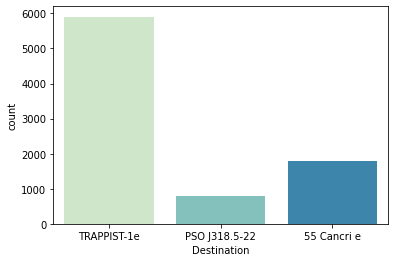

In [ ]:
sns.countplot(data=train,x="Destination", palette='GnBu');

### Cabin - Categorical

The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Will be used later in feature engineering

Has no useful information - DROP IT

In [ ]:
train["Cabin"].str.split("/")[0] #format

['B', '0', 'P']

In [ ]:
train["Cabin"].str.split("/").str[0].isna().sum() #missing values are ignored during split

194

### CryoSleep - Categorical (Binary)

Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [ ]:
train["CryoSleep"].value_counts()

False    5434
True     3031
Name: CryoSleep, dtype: int64

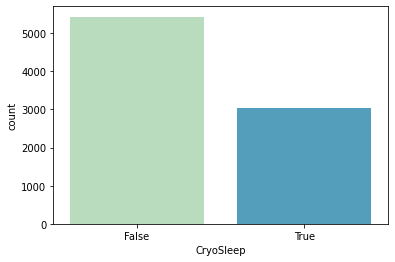

In [ ]:
sns.countplot(data=train,x="CryoSleep", palette='GnBu');

### HomePlanet - Categorical 

In [ ]:
train["HomePlanet"].value_counts()

Earth     4595
Europa    2129
Mars      1756
Name: HomePlanet, dtype: int64

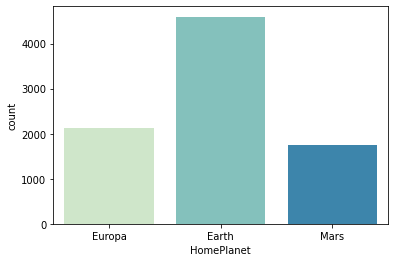

In [ ]:
sns.countplot(data=train,x="HomePlanet", palette='GnBu');

### PassengerId - Categorical

A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

Will be used later in feature engineering

Has no useful information - DROP IT

### Extra Plots

SKIP

In [ ]:
# num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age'] #numerical columns

In [ ]:
# #BOX PLOTS FOR ALL NUMERICAL VALUES
# fig, axes = plt.subplots(2, 3, figsize=(25,10))
# for i, col in zip(range(6), num_cols):
#     sns.boxplot(ax=axes[i//3][i%3], y=col, data=train, palette='GnBu',) #transported is our target column
#     axes[i//3][i%3].set_title(f'{col} Boxplot')

In [ ]:
# #BOX PLOTS FOR ALL NUMERICAL VALUES
# fig, axes = plt.subplots(2, 3, figsize=(25,10))
# for i, col in zip(range(6), num_cols):
#     sns.boxplot(ax=axes[i//3][i%3], x='Transported', y=col, data=train, palette='GnBu',) #transported is our target column
#     axes[i//3][i%3].set_title(f'{col} Boxplot')

In [ ]:
# #BOX PLOTS FOR ALL NUMERICAL VALUES
# fig, axes = plt.subplots(2, 3, figsize=(25,10))
# for i, col in zip(range(6), num_cols):
#     sns.boxplot(ax=axes[i//3][i%3], x='Transported', y=col, data=train, palette='GnBu',hue="VIP") #transported is our target column
#     axes[i//3][i%3].set_title(f'{col} Boxplot')

## Feature Engineering

### Amenities - Sum of all Amenities used - Numerical

In [ ]:
train["Amenities_Sum"] = train[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)
test["Amenities_Sum"] = test[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)

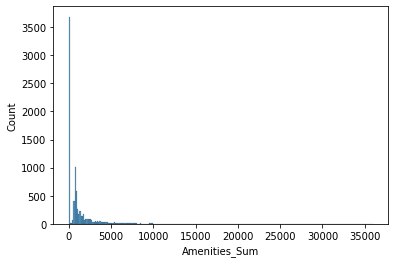

In [ ]:
sns.histplot(data=train,x="Amenities_Sum");

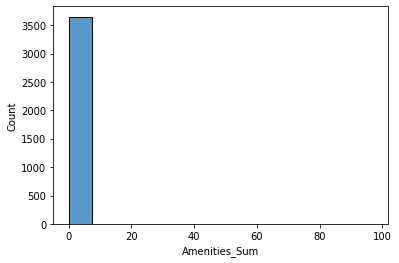

In [ ]:
mask = train["Amenities_Sum"]<100
sns.histplot(data=train[mask],x="Amenities_Sum");

**add constant and log transform**
since log(0) isn't defined

**common constant options**

https://aosmith.rbind.io/2018/09/19/the-log-0-problem/#common-choices-of-c

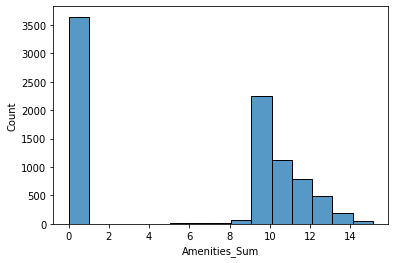

In [ ]:
#add 1
sns.histplot(x=np.log2(train['Amenities_Sum']+1)); #we add a small number to avoid having log0

In [ ]:
train['Amenities_Sum'].sort_values().unique()
#add the smallest non zero value, in our case it is 1 (same as above)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 3.1074e+04, 3.1076e+04,
       3.5987e+04])

In [ ]:
train['log_Amenities_Sum'] = np.log2(train['Amenities_Sum']+1e0)
test['log_Amenities_Sum'] = np.log2(test['Amenities_Sum']+1e0)

### We can observe that a great portion of passengers don't use amenities

### Cabin - Extract deck and side - Both Categorical

In [ ]:
train["Cabin"].str.split("/").str[0].value_counts() #deck value count

F    2789
G    2555
E     876
B     778
C     745
D     478
A     256
T       5
Name: Cabin, dtype: int64

In [ ]:
train["Deck"] = train["Cabin"].str.split("/").str[0]
test["Deck"] = test["Cabin"].str.split("/").str[0]

In [ ]:
train["Deck"].value_counts()

F    2789
G    2555
E     876
B     778
C     745
D     478
A     256
T       5
Name: Deck, dtype: int64

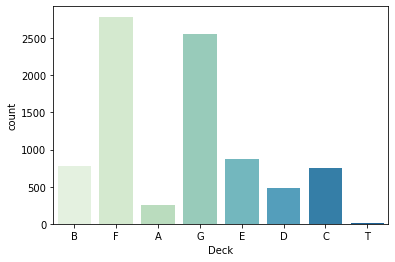

In [ ]:
sns.countplot(data=train,x="Deck", palette='GnBu');

In [ ]:
train["Cabin"].str.split("/").str[2].value_counts() #side value count

S    4279
P    4203
Name: Cabin, dtype: int64

In [ ]:
train["Cabin_Side"] = train["Cabin"].str.split("/").str[2]
test["Cabin_Side"] = test["Cabin"].str.split("/").str[2]

In [ ]:
train["Cabin_Side"].value_counts()

S    4279
P    4203
Name: Cabin_Side, dtype: int64

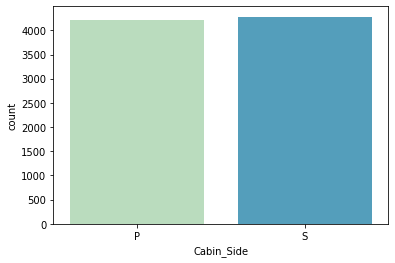

In [ ]:
sns.countplot(data=train,x="Cabin_Side", palette='GnBu');

### PassengerId - Part of a group Boolean - No of people in his group

 A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.


In [ ]:
train["no_People_in_Group"] = train["PassengerId"].str.split("_").str[1]
test["no_People_in_Group"] = test["PassengerId"].str.split("_").str[1]

In [ ]:
train["no_People_in_Group"].value_counts() #no people in group

01    6206
02    1408
03     570
04     231
05     127
06      75
07      46
08      13
Name: no_People_in_Group, dtype: int64

In [ ]:
test["no_People_in_Group"].value_counts() #no people in group

01    3063
02     723
03     269
04     107
05      56
06      33
07      20
08       6
Name: no_People_in_Group, dtype: int64

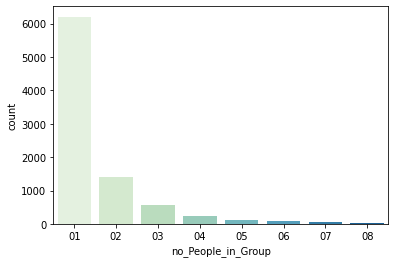

In [ ]:
sns.countplot(data=train,x="no_People_in_Group", palette='GnBu');

In [ ]:
train["Part_of_Group"] = train["PassengerId"].str.split("_").str[1].copy().astype(float)
test["Part_of_Group"] = test["PassengerId"].str.split("_").str[1].copy().astype(float)

In [ ]:
train["Part_of_Group"] = train["Part_of_Group"] - 1 #0 not part of group #1 part of  group
test["Part_of_Group"] = test["Part_of_Group"] - 1

mask = train["Part_of_Group"]>=1.0
train.loc[mask,"Part_of_Group"] = 1
mask = test["Part_of_Group"]>=1.0
test.loc[mask,"Part_of_Group"] = 1
# mask = test["no_People_in_Group"]=="01"
# test.loc[mask,"Part_of_Group"] = 1



In [ ]:
train["Part_of_Group"].value_counts()

0.0    6206
1.0    2470
Name: Part_of_Group, dtype: int64

In [ ]:
test["Part_of_Group"].value_counts()

0.0    3063
1.0    1214
Name: Part_of_Group, dtype: int64

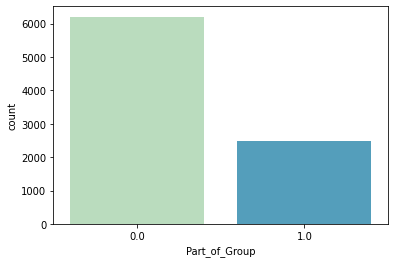

In [ ]:
sns.countplot(data=train,x="Part_of_Group", palette='GnBu');

### Name - Gender extraction - Categorical

SKIP Cannot be used

In [ ]:
!pip install gender_guesser


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 379 kB 14.5 MB/s 


In [ ]:
import gender_guesser.detector as gender
gd = gender.Detector()

In [ ]:
train['Name'].isna().sum()

195

In [ ]:
train['Name'].str.upper()

0         MAHAM OFRACCULY
1            JUANNA VINES
2           ALTARK SUSENT
3            SOLAM SUSENT
4       WILLY SANTANTINES
              ...        
8688    GRAVIOR NOXNUTHER
8689      KURTA MONDALLEY
8690         FAYEY CONNON
8691     CELEON HONTICHRE
8692     PROPSH HONTICHRE
Name: Name, Length: 8676, dtype: object

In [ ]:
train['Name'].str.split().str[0].str.upper().map(lambda x: gd.get_gender(x))

0       unknown
1       unknown
2       unknown
3       unknown
4       unknown
         ...   
8688    unknown
8689    unknown
8690    unknown
8691    unknown
8692    unknown
Name: Name, Length: 8676, dtype: object

## Extra EDA plots

In [ ]:
continuous_features = ['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'no_People_in_Group',
 "Amenities_Sum"]

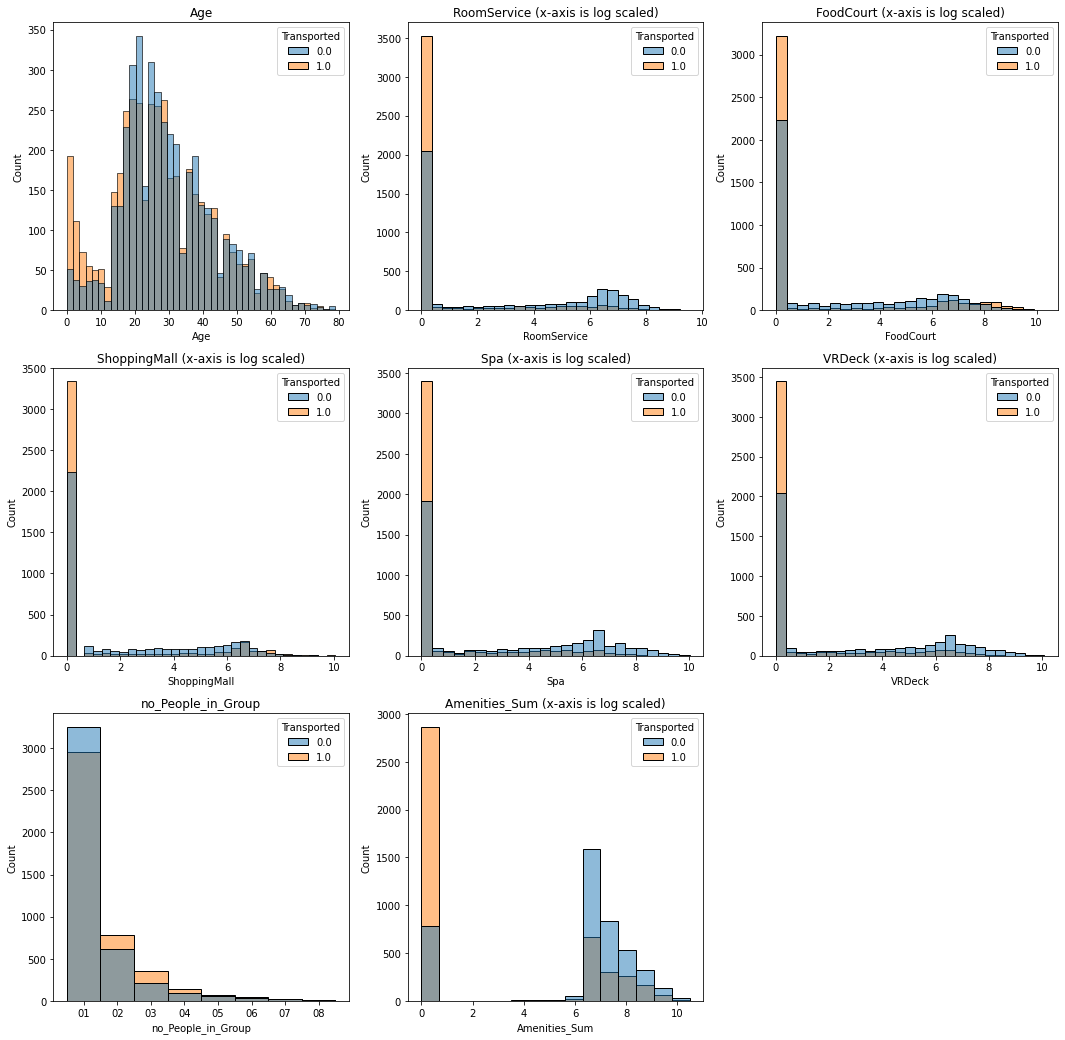

In [ ]:
fig = plt.figure(figsize=(18., 18.))
for i, c in enumerate(continuous_features):
    ax = plt.subplot(3, 3, 1 + i)
    if c in ('Age', 'no_People_in_Group'):
        ax = sns.histplot(data=train, x=c, hue='Transported')
        ax.set_title(c)
    else:
        # The range is very long so it should be log scaled for visibility.
        ax = sns.histplot(x=np.log1p(train[c]), hue=train['Transported'])
        ax.set_title(f'{c} (x-axis is log scaled)')

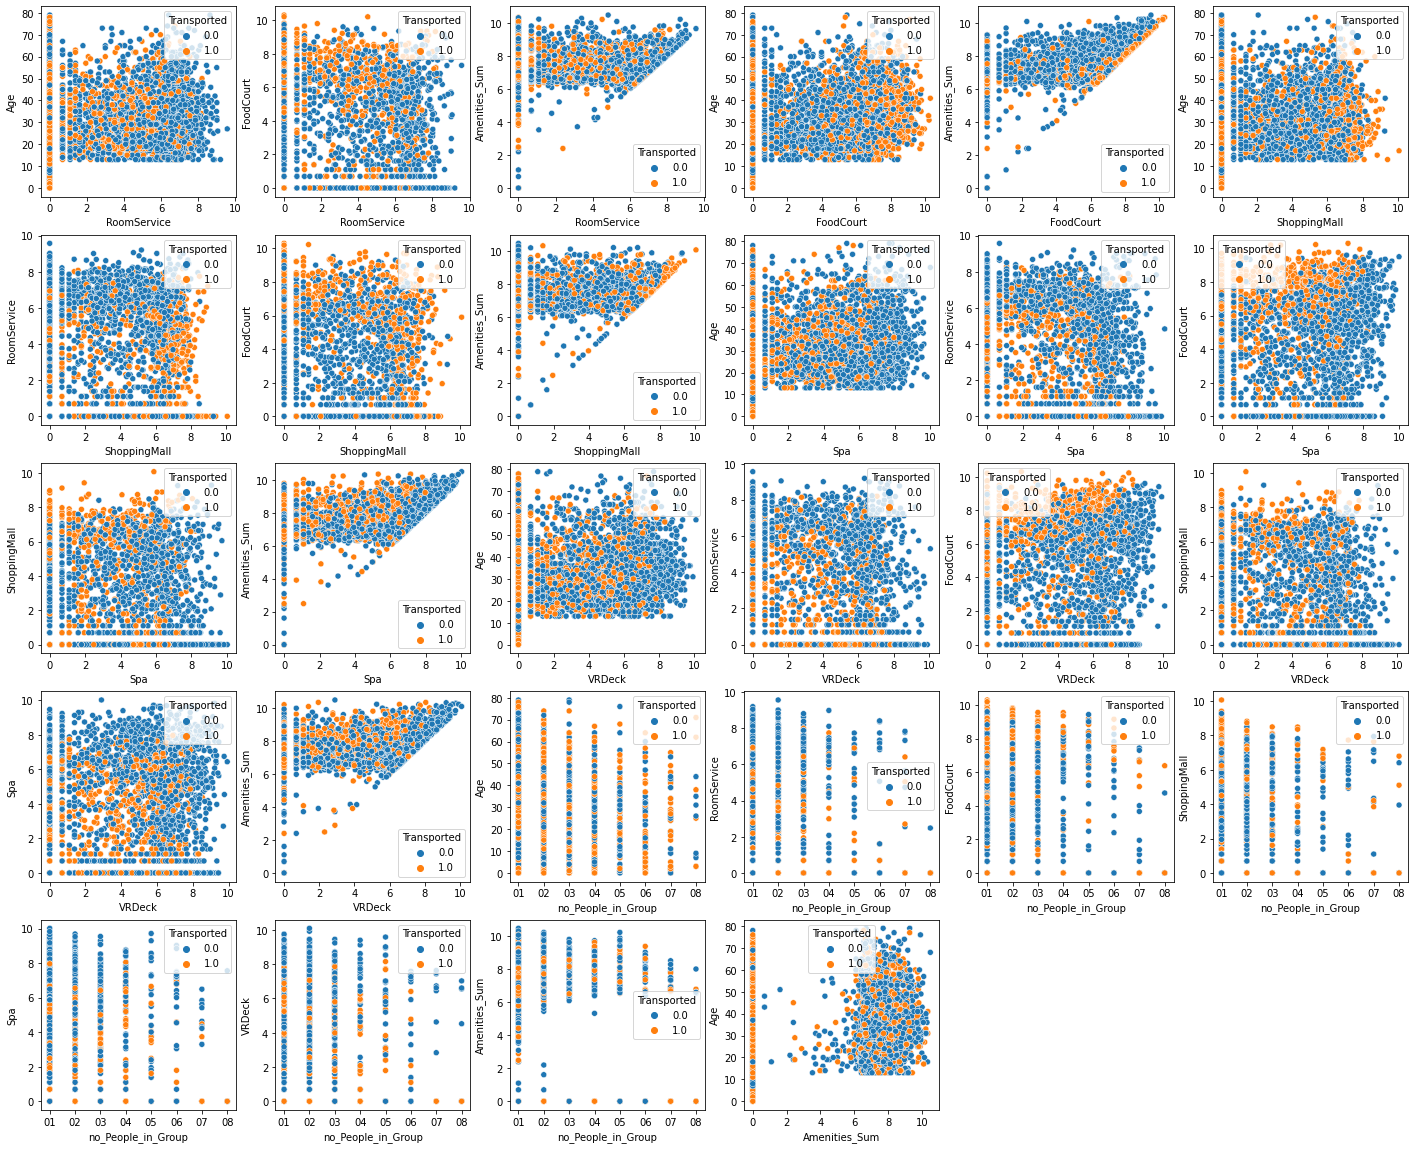

In [ ]:
fig = plt.figure(figsize=(24.5, 24.5))
pairs = [
    (x, y) for x in continuous_features
    for y in continuous_features
    if x > y
]
for i, (x, y) in enumerate(pairs):
    ax = plt.subplot(6, 6, 1 + i)
    
    # Some features should be log scaled for visualization
    if x in ('Age', 'no_People_in_Group') and y in ('Age', 'no_People_in_Group'):
        ax = sns.scatterplot(data=train, x=train[x], y=train[y], hue='Transported')
    elif x in ('Age', 'no_People_in_Group'):
        ax = sns.scatterplot(data=train, x=train[x], y=np.log1p(train[y]), hue='Transported')
    elif y in ('Age', 'no_People_in_Group'):
        ax = sns.scatterplot(data=train, x=np.log1p(train[x]), y=train[y], hue='Transported')
    else:
        ax = sns.scatterplot(data=train, x=np.log1p(train[x]), y=np.log1p(train[y]), hue='Transported')

In [ ]:
categorical_features =  ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', "Deck", 'Cabin_Side',"Part_of_Group"]

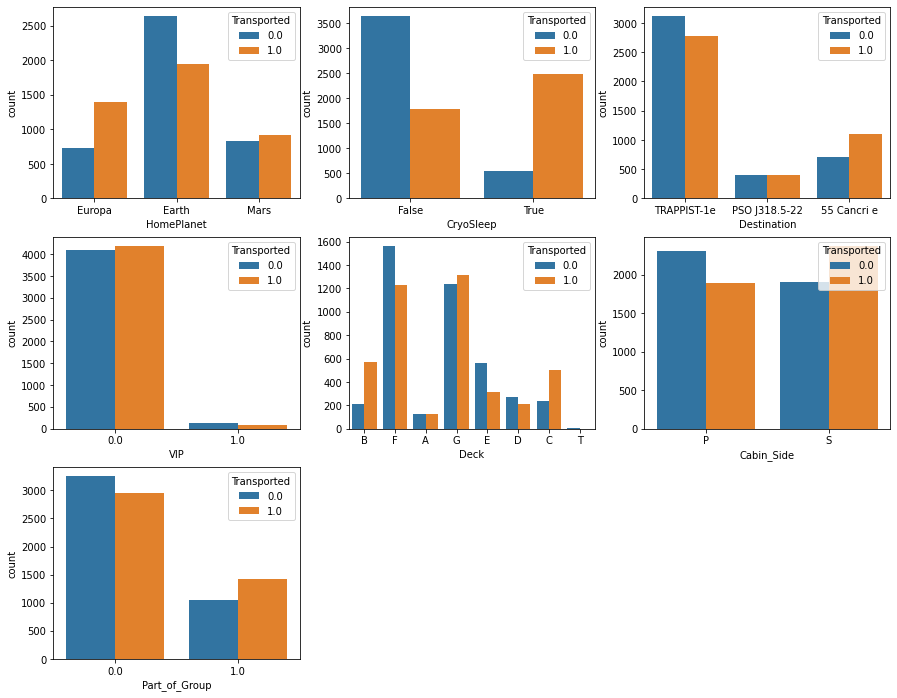

In [ ]:
fig = plt.figure(figsize=(15., 12.))
for i, c in enumerate(categorical_features):
    ax = plt.subplot(3, 3, 1 + i)
    ax = sns.countplot(data=train, x=c, hue='Transported')

Cryosleep seems to be a strong predictor

In [ ]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'log_VRDeck', 'log_Spa', 'log_ShoppingMall',
       'log_FoodCourt', 'log_RoomService', 'Amenities_Sum',
       'log_Amenities_Sum', 'Deck', 'Cabin_Side', 'no_People_in_Group',
       'Part_of_Group'],
      dtype='object')

In [ ]:
num_viz_columns = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","log_RoomService","log_FoodCourt","log_ShoppingMall","log_Spa","log_VRDeck","Amenities_Sum","no_People_in_Group"]

In [ ]:
fig = px.imshow(train[num_viz_columns].corr(), text_auto=True)
fig.show()

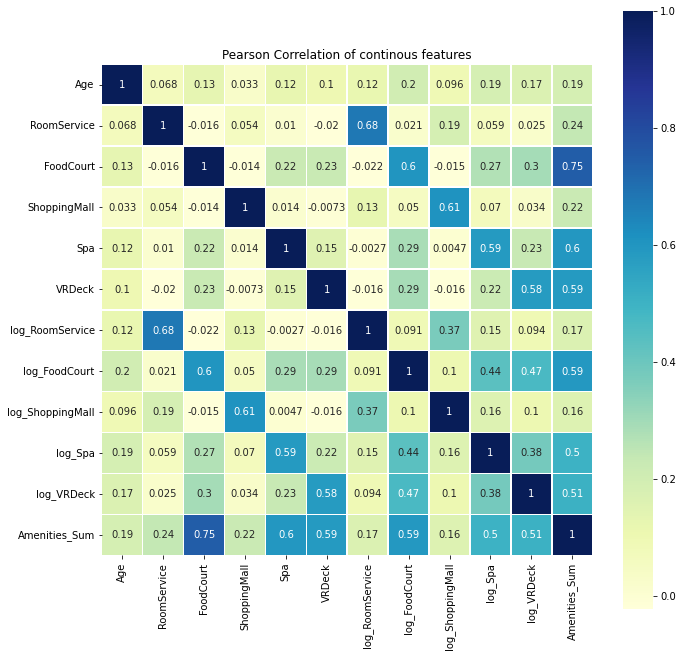

In [ ]:
plt.subplots(figsize=(11, 11))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(train[num_viz_columns].corr(), 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                );

##Data Preparation

In [ ]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'log_VRDeck', 'log_Spa', 'log_ShoppingMall',
       'log_FoodCourt', 'log_RoomService', 'Amenities_Sum',
       'log_Amenities_Sum', 'Deck', 'Cabin_Side', 'no_People_in_Group',
       'Part_of_Group'],
      dtype='object')

In [ ]:
train["Deck"].value_counts() #order matters, since decks go from high to low

F    2789
G    2555
E     876
B     778
C     745
D     478
A     256
T       5
Name: Deck, dtype: int64

In [ ]:
categorical_columns = ["HomePlanet","CryoSleep","Destination","VIP","Cabin_Side","Part_of_Group"]
numerical_columns = ["Age","log_Amenities_Sum",'log_VRDeck', 'log_Spa', 'log_ShoppingMall','log_FoodCourt', 'log_RoomService']
ordinal_cols = ["Deck"]
ordinal_cols_no_modif=["no_People_in_Group"] #just impute, don't change the "labels"
output_col = ["Transported"]

In [ ]:
import itertools
all_cols = list(itertools.chain(categorical_columns,numerical_columns,ordinal_cols,ordinal_cols_no_modif,output_col))
all_cols

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin_Side',
 'Part_of_Group',
 'Age',
 'log_Amenities_Sum',
 'log_VRDeck',
 'log_Spa',
 'log_ShoppingMall',
 'log_FoodCourt',
 'log_RoomService',
 'Deck',
 'no_People_in_Group',
 'Transported']

In [ ]:
categorical_pipe = Pipeline([
    ('impute', SimpleImputer(strategy="most_frequent",add_indicator=False)),
    ('one_hot', OneHotEncoder())
])

# output_pipe = Pipeline([
#     ('one_hot', OneHotEncoder(drop='if_binary'))
# ])

ordinal_pipe = Pipeline([
    ('impute', SimpleImputer(strategy="most_frequent",add_indicator=False)),
    ('label', OrdinalEncoder())
])

ordinal_pipe_no_modif = Pipeline([
    ('impute', SimpleImputer(strategy="most_frequent",add_indicator=False)),
])

numerical_pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),  #distributions are skewed and have outliers thus we will use median which is more robust for both cases
    ('scale', StandardScaler()),
])

preprocessing = ColumnTransformer(
    [
        ("categ", categorical_pipe, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
        #("out", output_pipe,output_col),
        ("ord", ordinal_pipe, ordinal_cols),
        ("ord_no_modif", ordinal_pipe_no_modif, ordinal_cols_no_modif),
    ],
    remainder="drop",#drop columns not specified explicitely above
    verbose_feature_names_out=False,
    verbose=True,

)

# preproc = Pipeline([("preprocess",preprocessing)])
# preproc

In [ ]:
set_config(display="diagram")
preprocessing

ColumnTransformer(transformers=[('categ',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot', OneHotEncoder())]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'Cabin_Side', 'Part_of_Group']),
                                ('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'log_Amenities_Sum', 'log_VRDeck',
                                  'log_Spa', 'log_ShoppingMall',
                                  'log_FoodCourt', 'log_RoomService']),
                                ('ord',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('label', OrdinalEncoder())]),
                                 ['Deck']),
                                ('ord_no_modif',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['no_People_in_Group'])],
                  verbose=True, verbose_feature_names_out=False)

In [ ]:
#check if ordinal encoder encodes correctly
enc = OrdinalEncoder()
enc.fit(train["Deck"].values.reshape(-1,1))
temp = enc.transform(train["Deck"].values.reshape(-1,1))
print(train["Deck"][:7]) #check if it works
temp[:7]

0    B
1    F
2    A
3    A
4    F
5    F
6    F
Name: Deck, dtype: object


array([[1.],
       [5.],
       [0.],
       [0.],
       [5.],
       [5.],
       [5.]])

In [ ]:
enc.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object)]

In [ ]:
#output preparation
#enc = OneHotEncoder(drop='if_binary')
enc = OneHotEncoder()
enc.fit(train[output_col[0]].values.reshape(-1,1))
y_train = enc.transform(train[output_col[0]].values.reshape(-1,1))
print(train[output_col[0]][:7]) #check if it works
y_train.todense()[:7]

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
5    1.0
6    1.0
Name: Transported, dtype: float64


matrix([[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [ ]:
train_prepped = preprocessing.fit_transform(train)

[ColumnTransformer] ......... (1 of 4) Processing categ, total=   0.0s
[ColumnTransformer] ........... (2 of 4) Processing num, total=   0.0s
[ColumnTransformer] ........... (3 of 4) Processing ord, total=   0.0s
[ColumnTransformer] .. (4 of 4) Processing ord_no_modif, total=   0.0s


In [ ]:
test_prepped = preprocessing.transform(test)

## Model fitting

In [ ]:
# models = [

#     XGBClassifier(eval_metric = 'logloss', 
#                               max_depth = 5, 
#                               min_child_weight = 3, 
#                                gamma = 3, 
#                                colsample_bytree = 0.5, 
#                                n_estimators=700),
#     LGBMClassifier(n_estimators=600, max_bin=400, num_leaves=24),
#     CatBoostClassifier(silent=True, depth=6, l2_leaf_reg=7, learning_rate=0.1, n_estimators=500),
#     
# ]

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(train_prepped,np.array(y_train.todense()),test_size=0.15)

### Random Forest

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_prepped,np.array(y_train.todense()),test_size=0.15)

In [ ]:
param_grid = { 
    #'n_estimators': [25, 50, 100, 150, 200, 250, 300, 500],
    'n_estimators': [50, 100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9,11],
    "min_samples_split": [15, 20],
    "min_samples_leaf": [5, 10, 20],
    "max_leaf_nodes": [20, 40],
    #'criterion' :['gini', 'entropy'] #gini and entropy are similar so not worth the extra complexity
}


In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=1,verbose=1,scoring='accuracy') #n_jobs must equal 1 for verbose to work
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [20, 40],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [15, 20],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
print(best_params)
grid_search.best_score_

{'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 40, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}


0.7900719821539453

In [ ]:
model = RandomForestClassifier(**best_params,oob_score=True)
model.fit(X_train,Y_train)
y_tr_preds =model.predict(X_train)
y_t_preds = model.predict(X_test)

In [ ]:
Y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
y_tr_preds

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train[:,1], y_tr_preds[:,1]))#train

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      3673
         1.0       0.81      0.79      0.80      3701

    accuracy                           0.80      7374
   macro avg       0.80      0.80      0.80      7374
weighted avg       0.80      0.80      0.80      7374



In [ ]:
print(classification_report(Y_test[:,1], y_t_preds[:,1]))#test

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80       635
         1.0       0.82      0.77      0.79       667

    accuracy                           0.79      1302
   macro avg       0.80      0.79      0.79      1302
weighted avg       0.80      0.79      0.79      1302



[[2986  687]
 [ 785 2916]]


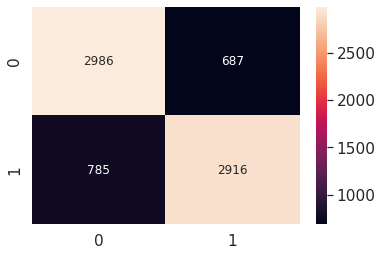

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train[:,1], y_tr_preds[:,1])
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()#train

[[521 114]
 [154 513]]


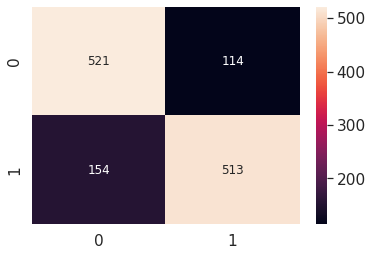

In [ ]:
conf_matrix = confusion_matrix(Y_test[:,1], y_t_preds[:,1])
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()#test

In [ ]:
model.oob_score_

0.7841063195009493

In [ ]:
#feature imoortance

### Adaboost

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_prepped,np.array(y_train.todense())[:,1],test_size=0.15)

In [ ]:
param_grid = { 
    #'n_estimators': [25, 50, 100, 150, 200, 250, 300, 500],
    'n_estimators': [5, 10, 25, 50, 100, 250, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],

}

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, n_jobs=1,verbose=1,scoring='accuracy') #n_jobs must equal 1 for verbose to work
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)

model = AdaBoostClassifier(**best_params)
model.fit(X_train,Y_train)
y_tr_preds =model.predict(X_train)
y_t_preds = model.predict(X_test)



Fitting 5 folds for each of 35 candidates, totalling 175 fits
{'learning_rate': 0.1, 'n_estimators': 500}
0.7898012556631328


In [ ]:
from sklearn.metrics import classification_report
print("train")
print(classification_report(Y_train, y_tr_preds))
print()
print("test")
print(classification_report(Y_test, y_t_preds))

train
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      3691
         1.0       0.78      0.83      0.80      3683

    accuracy                           0.80      7374
   macro avg       0.80      0.80      0.80      7374
weighted avg       0.80      0.80      0.80      7374


test
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       617
         1.0       0.80      0.82      0.81       685

    accuracy                           0.80      1302
   macro avg       0.80      0.80      0.80      1302
weighted avg       0.80      0.80      0.80      1302



train
[[2820  871]
 [ 636 3047]]


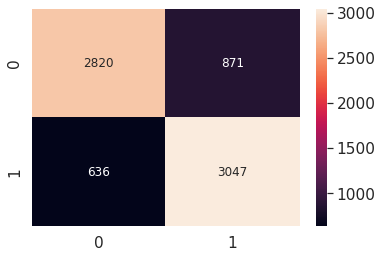

In [ ]:
print("train")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train, y_tr_preds)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

test
[[478 139]
 [125 560]]


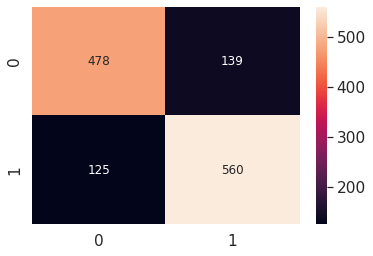

In [ ]:
print("test")

conf_matrix = confusion_matrix(Y_test, y_t_preds)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

### Extra Tree 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_prepped,np.array(y_train.todense()),test_size=0.15)

In [ ]:
param_grid = { 
    #'n_estimators': [25, 50, 100, 150, 200, 250, 300, 500],
    'n_estimators': [50, 100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9,11],
    "min_samples_split": [15, 20],
    "min_samples_leaf": [5, 10, 20],
    "max_leaf_nodes": [20, 40],
    #'criterion' :['gini', 'entropy'] #gini and entropy are similar so not worth the extra complexity
}


grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5, n_jobs=1,verbose=1,scoring='accuracy') #n_jobs must equal 1 for verbose to work
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)

model = ExtraTreesClassifier(**best_params,)
model.fit(X_train,Y_train)
y_tr_preds =model.predict(X_train)
y_t_preds = model.predict(X_test)



Fitting 5 folds for each of 900 candidates, totalling 4500 fits
{'max_depth': 11, 'max_features': 'sqrt', 'max_leaf_nodes': 40, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 50}
0.7584761860957154


In [ ]:
from sklearn.metrics import classification_report
print("train")
print(classification_report(Y_train, y_tr_preds))
print()
print("test")
print(classification_report(Y_test[:,1], y_t_preds[:,1]))

train
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      3674
           1       0.80      0.69      0.74      3700

   micro avg       0.76      0.76      0.76      7374
   macro avg       0.76      0.76      0.76      7374
weighted avg       0.76      0.76      0.76      7374
 samples avg       0.76      0.76      0.76      7374


test
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77       634
         1.0       0.82      0.67      0.74       668

    accuracy                           0.75      1302
   macro avg       0.76      0.76      0.75      1302
weighted avg       0.76      0.75      0.75      1302



train
[[3059  615]
 [1164 2536]]


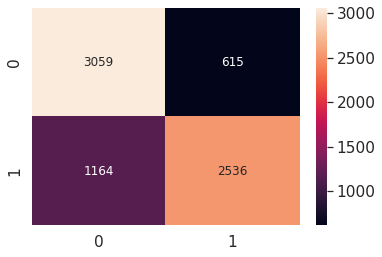

In [ ]:
print("train")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train[:,1], y_tr_preds[:,1])
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

test
[[534 100]
 [219 449]]


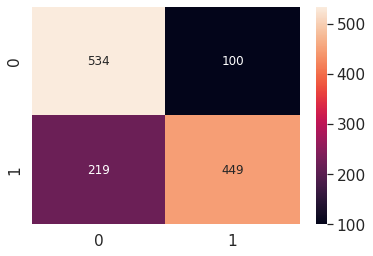

In [ ]:
print("test")

conf_matrix = confusion_matrix(Y_test[:,1], y_t_preds[:,1])
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

### Gradient Boosting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_prepped,np.array(y_train.todense())[:,1],test_size=0.15)

In [ ]:
param_grid = { 
    'n_estimators': [25, 50, 100, 250, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'max_depth' : [3,7,11],
    "min_samples_split": [15, 20],
    "min_samples_leaf": [5, 10, 20],
    "max_leaf_nodes": [20, 40],
}



grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=1,verbose=1,scoring='accuracy') #n_jobs must equal 1 for verbose to work
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)

model = GradientBoostingClassifier(**best_params)
model.fit(X_train,Y_train)
y_tr_preds =model.predict(X_train)
y_t_preds = model.predict(X_test)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
{'learning_rate': 0.01, 'max_depth': 11, 'max_leaf_nodes': 40, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 500}
0.8098743876917416


In [ ]:
from sklearn.metrics import classification_report
print("train")
print(classification_report(Y_train, y_tr_preds))
print()
print("test")
print(classification_report(Y_test, y_t_preds))

train
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      3633
         1.0       0.85      0.89      0.87      3741

    accuracy                           0.86      7374
   macro avg       0.86      0.86      0.86      7374
weighted avg       0.86      0.86      0.86      7374


test
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       675
         1.0       0.75      0.83      0.79       627

    accuracy                           0.78      1302
   macro avg       0.78      0.78      0.78      1302
weighted avg       0.79      0.78      0.78      1302



train
[[3025  608]
 [ 407 3334]]


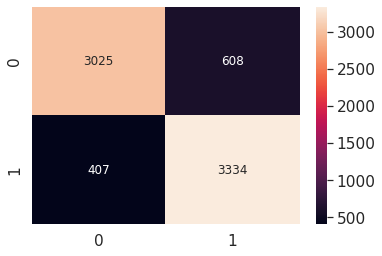

In [ ]:
print("train")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train, y_tr_preds)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

test
[[501 174]
 [109 518]]


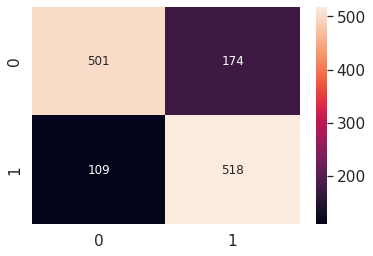

In [ ]:
print("test")

conf_matrix = confusion_matrix(Y_test, y_t_preds)
print(conf_matrix)
df_cm = pd.DataFrame(conf_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()